Accuracy: 1.00

Confusion Matrix:
 [[1647    0]
 [   0  353]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1647
           1       1.00      1.00      1.00       353

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



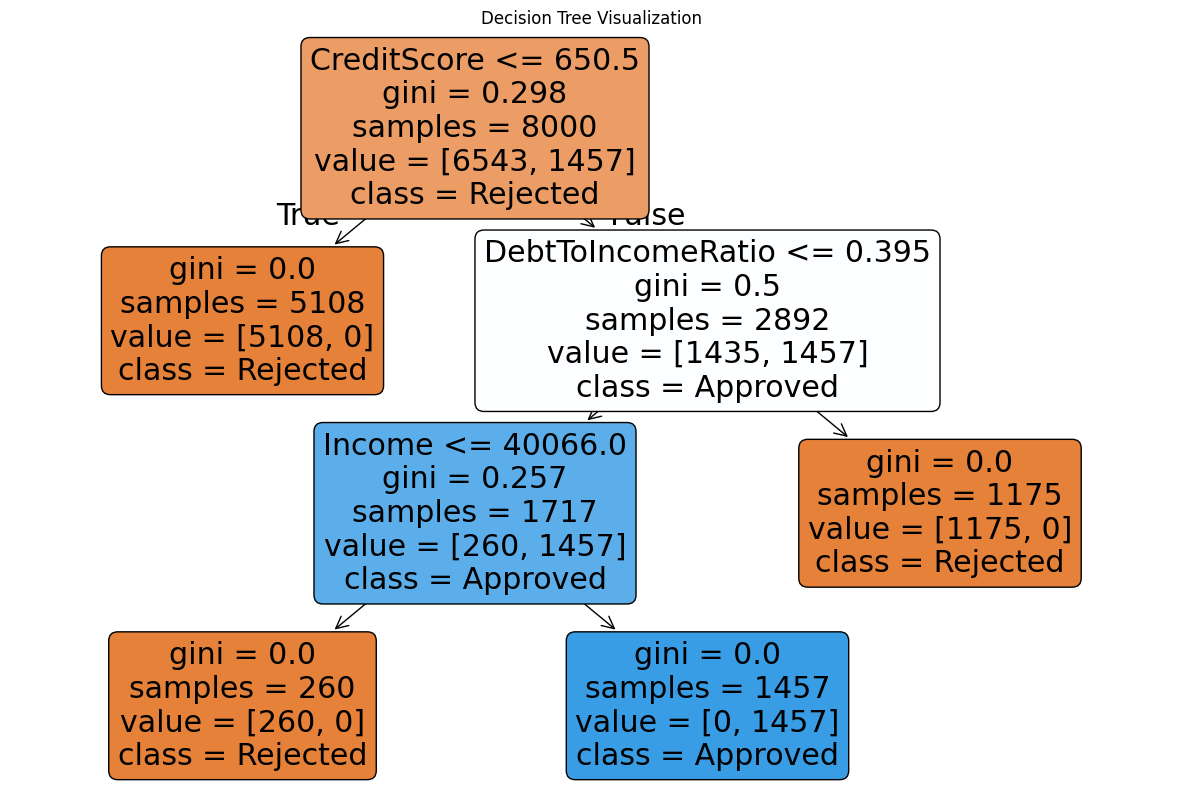

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 📌 Load dataset
file_path = "loan_approval_data.csv"  
df = pd.read_csv(file_path)

# 📌 Handle missing values (if any)
df.fillna(df.median(numeric_only=True), inplace=True)

# 📌 Encode categorical variables
le = LabelEncoder()
df["EmploymentStatus"] = le.fit_transform(df["EmploymentStatus"])
df["ApprovalStatus"] = le.fit_transform(df["ApprovalStatus"])  # Target variable

# 📌 Define features and target
X = df.drop(columns=["ID", "ApprovalStatus"])  # Features
y = df["ApprovalStatus"]  # Target

# 📌 Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 📌 Train Decision Tree Classifier
clf = DecisionTreeClassifier(criterion="gini", max_depth=5, random_state=42)
clf.fit(X_train, y_train)

# 📌 Predict on test data
y_pred = clf.predict(X_test)

# 📌 Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# 📌 Print results
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", report)

# 📌 Visualize Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(clf, feature_names=X.columns, class_names=["Rejected", "Approved"], filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()
